# Projeto de Machine Learning - Predi√ß√£o de Diabetes

**Objetivo**: Implementar uma esteira completa de aprendizado de m√°quina seguindo os 9 requisitos:

‚úÖ **1. Dataset UCI/Kaggle**: Pima Indians Diabetes Dataset

‚úÖ **2. Estat√≠sticas descritivas** gerais da base

‚úÖ **3. Transforma√ß√£o em colunas** (balanceamento de classes)

‚úÖ **4. Transforma√ß√£o em linhas** (remo√ß√£o de valores inconsistentes)

‚úÖ **5. Tr√™s subconjuntos**: treino, valida√ß√£o e teste

‚úÖ **6. Treinamento e avalia√ß√£o** do modelo

‚úÖ **7. Matriz de confus√£o e acur√°cia**

‚úÖ **8. Predi√ß√£o** com modelo implantado

‚úÖ **9. Coment√°rios passo a passo** para fins educacionais

---

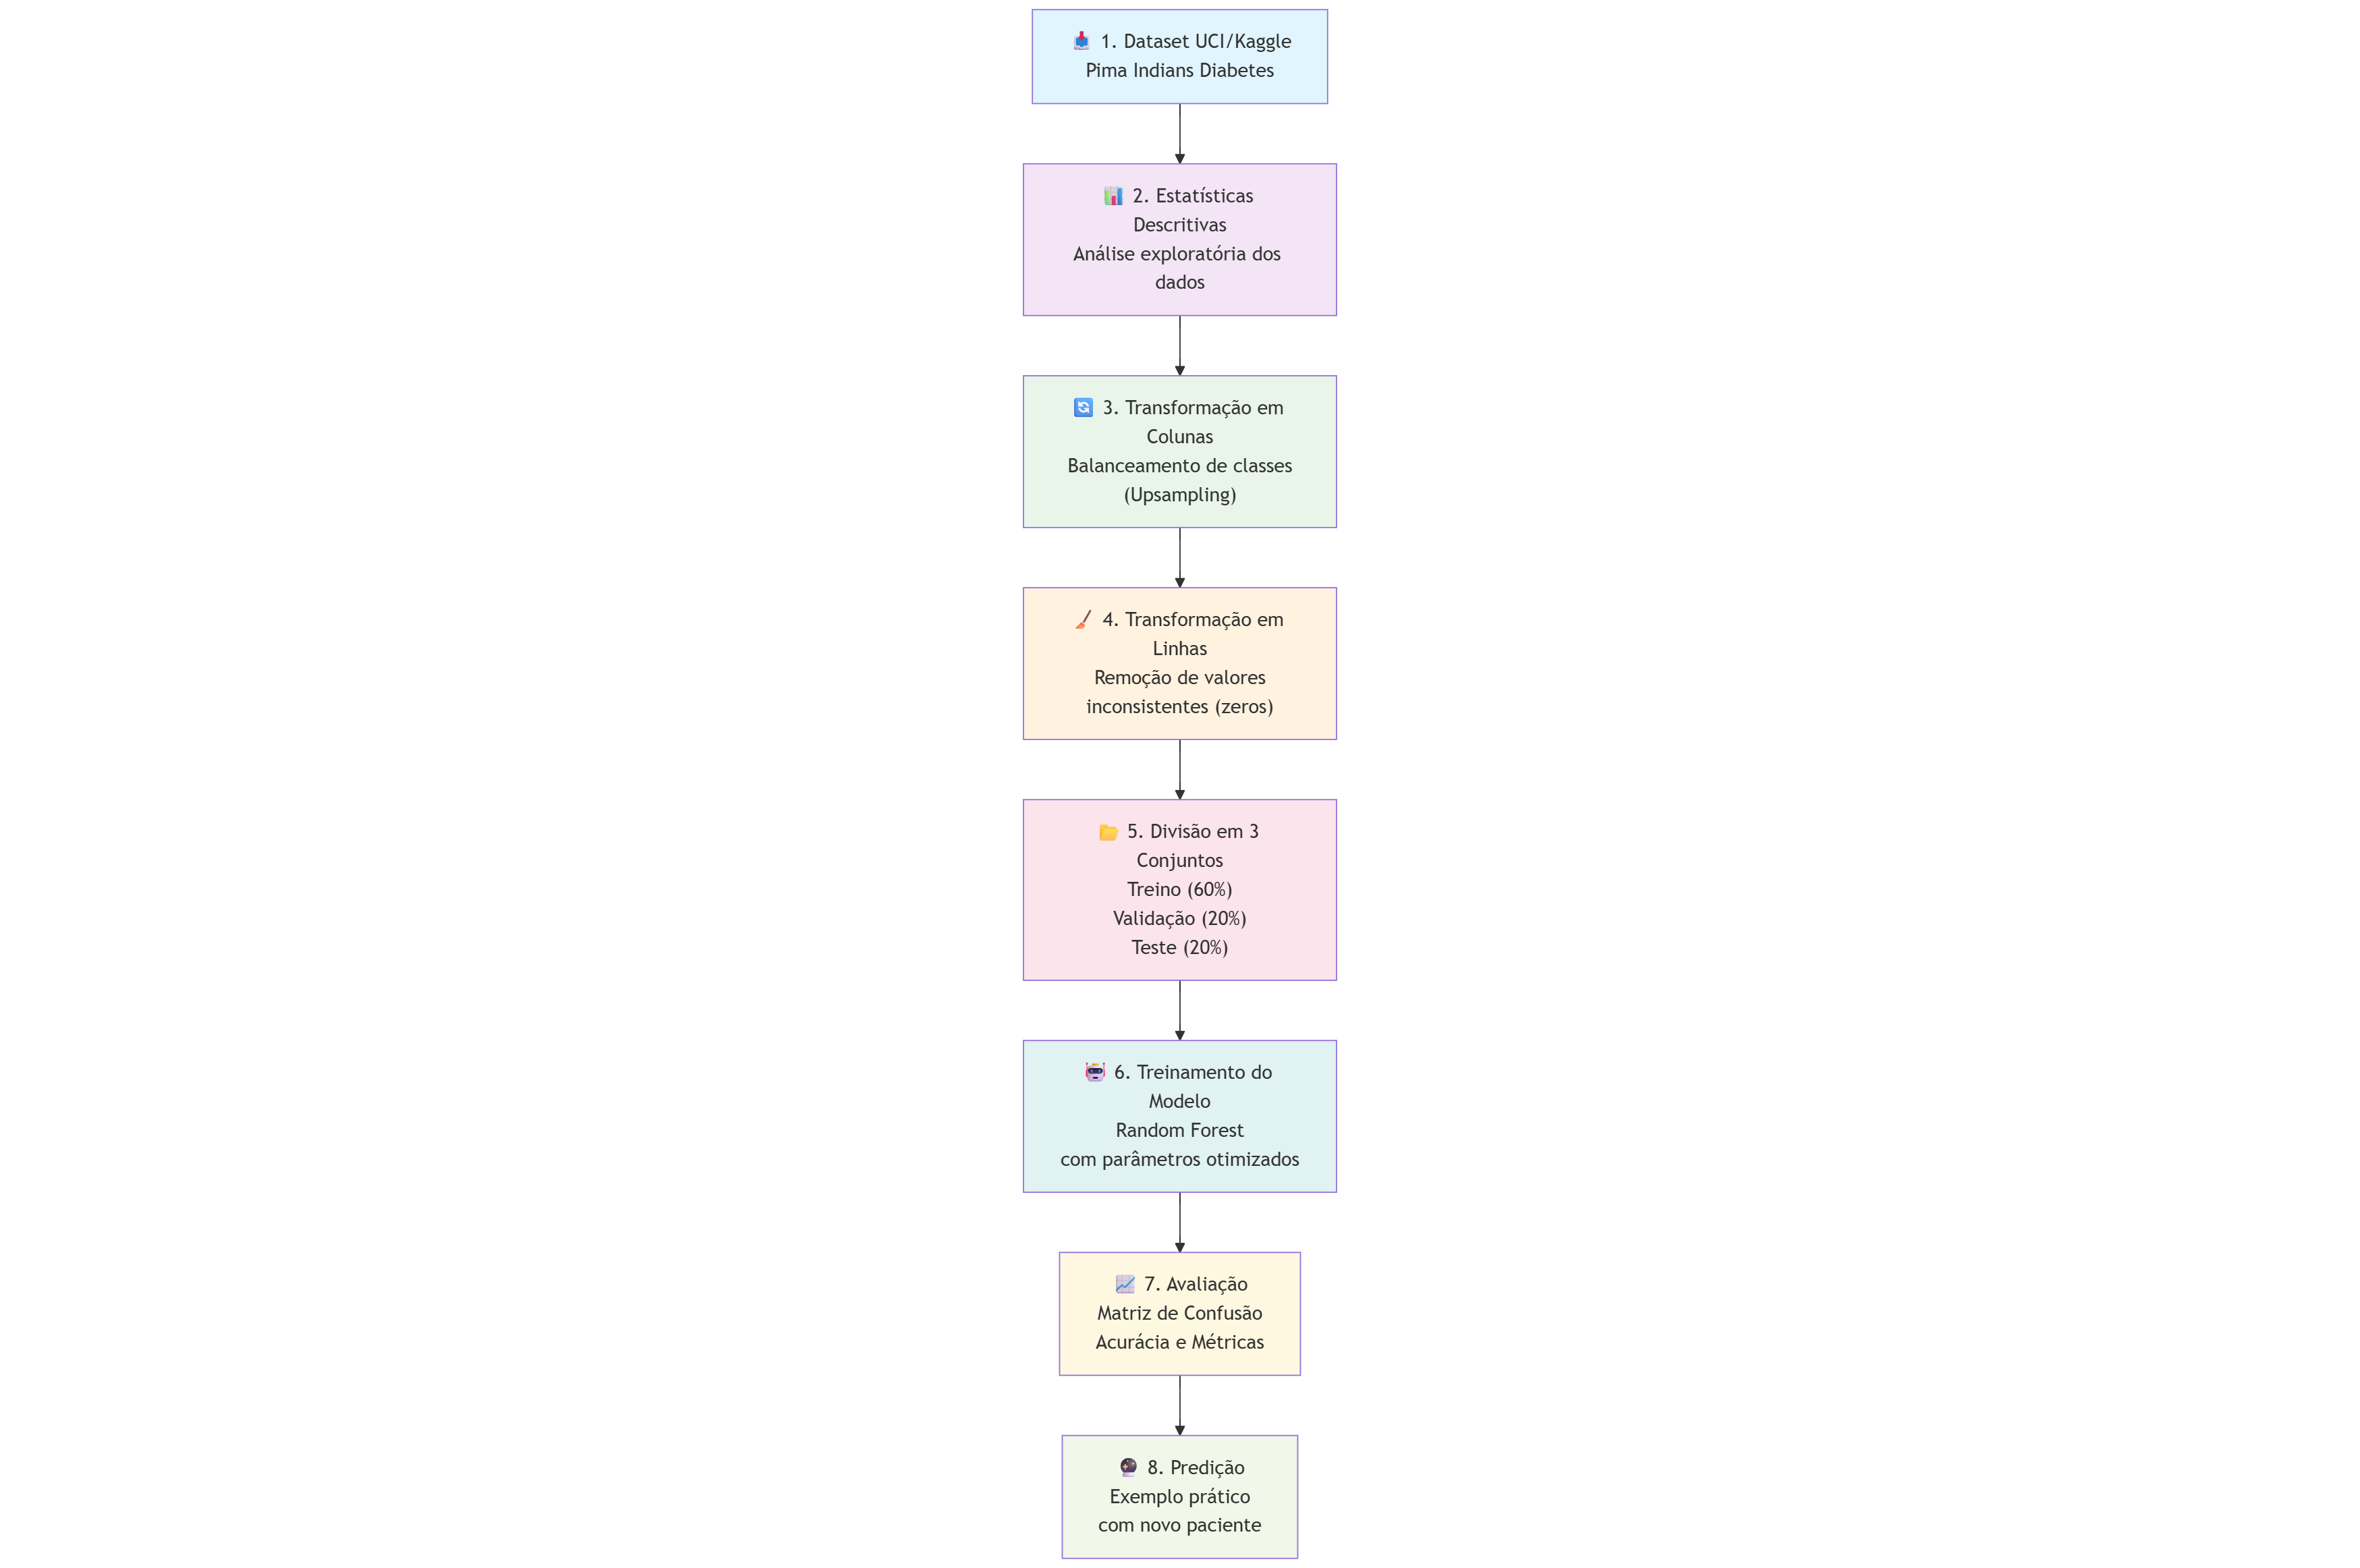

**Justificativa da Metodologia:**
- **Estrutura sequencial**: Cada etapa depende da anterior
- **Valida√ß√£o rigorosa**: Tr√™s conjuntos garantem avalia√ß√£o confi√°vel
- **Tratamento de dados**: Balanceamento e limpeza melhoram a qualidade
- **Interpretabilidade**: Foco em explica√ß√µes para fins educacionais

---

## 1. Importa√ß√£o de Bibliotecas

**Por que fazer**: Precisamos importar as ferramentas necess√°rias para:
- Manipular dados (pandas, numpy)
- Visualizar informa√ß√µes (matplotlib, seaborn)
- Criar e avaliar modelos de ML (sklearn)

In [2]:
# Importando bibliotecas para manipula√ß√£o de dados
import pandas as pd
import numpy as np

# Importando bibliotecas para visualiza√ß√£o
import matplotlib.pyplot as plt
import seaborn as sns

# Importando bibliotecas para machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Configura√ß√µes de visualiza√ß√£o
plt.rcParams['figure.figsize'] = (8, 5)
sns.set_style('whitegrid')

print("‚úÖ Bibliotecas importadas com sucesso!")

‚úÖ Bibliotecas importadas com sucesso!


## 2. Carregamento e Visualiza√ß√£o Inicial do Dataset

**Requisito 1**: Escolher dataset do UCI ou Kaggle

**Dataset escolhido**: Pima Indians Diabetes Dataset
- **Origem**: UCI Machine Learning Repository
- **Objetivo**: Predizer se uma pessoa tem diabetes
- **Vari√°veis**: 8 caracter√≠sticas m√©dicas + 1 vari√°vel alvo (Outcome)

In [ ]:
# Carregando o dataset Pima Indians Diabetes do UCI
# Fonte: https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes
url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
df = pd.read_csv(url)

print(f"Dataset carregado: {df.shape[0]} linhas e {df.shape[1]} colunas")
print("\nüìã Primeiras 5 linhas do dataset:")
print(df.head())

print("\nüìä Informa√ß√µes das colunas:")
print(df.info())

print("\nüè∑Ô∏è Significado das colunas:")
print("- Pregnancies: N√∫mero de gesta√ß√µes")
print("- Glucose: Concentra√ß√£o de glicose")
print("- BloodPressure: Press√£o arterial")
print("- SkinThickness: Espessura da pele")
print("- Insulin: N√≠vel de insulina")
print("- BMI: √çndice de massa corporal")
print("- DiabetesPedigreeFunction: Fun√ß√£o de hereditariedade")
print("- Age: Idade")
print("- Outcome: 0 = N√£o diab√©tico, 1 = Diab√©tico")

Dataset carregado: 768 linhas e 9 colunas

üìã Primeiras 5 linhas do dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

üìä Informa√ß√µes das colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    -

## 3. Estat√≠sticas Descritivas

**Requisito 2**: Apresentar estat√≠sticas descritivas gerais

**Por que fazer**: Para entender a distribui√ß√£o dos dados, identificar poss√≠veis problemas e orientar as transforma√ß√µes necess√°rias.

In [ ]:
# Estat√≠sticas descritivas gerais
print("üìä ESTAT√çSTICAS DESCRITIVAS COMPLETAS:")
print(df.describe())

# Verificando valores ausentes
print("\nüîç VALORES AUSENTES:")
print(df.isnull().sum())

# Distribui√ß√£o da vari√°vel alvo (Outcome)
print("\nüéØ DISTRIBUI√á√ÉO DA VARI√ÅVEL ALVO:")
print(df['Outcome'].value_counts())
print(f"Propor√ß√£o: {df['Outcome'].value_counts(normalize=True)}")

# Visualizando a distribui√ß√£o das classes
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Outcome', hue='Outcome', palette='viridis', legend=False)
plt.title('Distribui√ß√£o das Classes')
plt.xlabel('Outcome (0=N√£o Diab√©tico, 1=Diab√©tico)')
plt.ylabel('Quantidade')
plt.show()

# Verificando valores zero problem√°ticos
print("\n‚ö†Ô∏è VALORES ZERO PROBLEM√ÅTICOS:")
print("(Valores zero podem ser inconsistentes em algumas vari√°veis m√©dicas)")
cols_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_zero:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} valores zero ({zero_count/len(df)*100:.1f}%)")

: 

## 4. Transforma√ß√µes nos Dados

**Requisitos 3 e 4**: Aplicar transforma√ß√µes em colunas e linhas

### 4.1 Transforma√ß√£o em Colunas: Balanceamento de Classes
**Por que fazer**: O dataset est√° desbalanceado (mais n√£o-diab√©ticos que diab√©ticos). Isso pode fazer o modelo tender a sempre prever "n√£o diab√©tico".

In [ ]:
# TRANSFORMA√á√ÉO EM COLUNAS: Balanceamento das classes
print("üîÑ TRANSFORMA√á√ÉO EM COLUNAS: Balanceamento")
print("\nAntes do balanceamento:")
print(df['Outcome'].value_counts())

# Separando classes majorit√°ria e minorit√°ria
df_majority = df[df.Outcome == 0]  # N√£o diab√©ticos
df_minority = df[df.Outcome == 1]  # Diab√©ticos

# Aumentando a classe minorit√°ria (upsampling)
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, 
                                replace=True,     # permite repeti√ß√£o
                                n_samples=len(df_majority),  # mesmo tamanho da majorit√°ria
                                random_state=42)  # para reprodutibilidade

# Combinando as classes balanceadas
df_balanced = pd.concat([df_majority, df_minority_upsampled])

print("\nAp√≥s o balanceamento:")
print(df_balanced['Outcome'].value_counts())
print(f"\n‚úÖ Classes balanceadas: {len(df_balanced)} registros total")

üîÑ TRANSFORMA√á√ÉO EM COLUNAS: Balanceamento

Antes do balanceamento:
Outcome
0    500
1    268
Name: count, dtype: int64

Ap√≥s o balanceamento:
Outcome
0    500
1    500
Name: count, dtype: int64

‚úÖ Classes balanceadas: 1000 registros total


### 4.2 Transforma√ß√£o em Linhas: Remo√ß√£o de Valores Inconsistentes
**Por que fazer**: Valores zero em vari√°veis como Glucose, BloodPressure e BMI s√£o medicamente imposs√≠veis e podem prejudicar o modelo.

In [ ]:
# TRANSFORMA√á√ÉO EM LINHAS: Remo√ß√£o de valores inconsistentes
print("üîÑ TRANSFORMA√á√ÉO EM LINHAS: Limpeza")
print(f"\nTamanho antes da limpeza: {len(df_balanced)} registros")

# Removendo registros com valores zero nas vari√°veis cr√≠ticas
# (valores zero s√£o medicamente imposs√≠veis nessas vari√°veis)
df_clean = df_balanced.copy()

# Vari√°veis onde zero √© problem√°tico
cols_to_clean = ['Glucose', 'BloodPressure', 'BMI']

print("\nRemovendo valores zero das vari√°veis cr√≠ticas:")
for col in cols_to_clean:
    before = len(df_clean)
    df_clean = df_clean[df_clean[col] > 0]
    removed = before - len(df_clean)
    print(f"- {col}: {removed} registros removidos")

print(f"\nTamanho ap√≥s a limpeza: {len(df_clean)} registros")
print(f"Registros removidos: {len(df_balanced) - len(df_clean)} ({(len(df_balanced) - len(df_clean))/len(df_balanced)*100:.1f}%)")

print("\n‚úÖ Dados limpos e prontos para modelagem!")

üîÑ TRANSFORMA√á√ÉO EM LINHAS: Limpeza

Tamanho antes da limpeza: 1000 registros

Removendo valores zero das vari√°veis cr√≠ticas:
- Glucose: 6 registros removidos
- BloodPressure: 44 registros removidos
- BMI: 4 registros removidos

Tamanho ap√≥s a limpeza: 946 registros
Registros removidos: 54 (5.4%)

‚úÖ Dados limpos e prontos para modelagem!


## 5. Divis√£o em Conjuntos: Treino, Valida√ß√£o e Teste

**Requisito 5**: Criar tr√™s subconjuntos

**Por que fazer**: 
- **Treino**: Para ensinar o modelo
- **Valida√ß√£o**: Para ajustar par√¢metros
- **Teste**: Para avaliar performance final (dados "nunca vistos")

In [ ]:
# Separando vari√°veis independentes (X) e dependente (y)
X = df_clean.drop('Outcome', axis=1)  # Todas as colunas exceto Outcome
y = df_clean['Outcome']                # Apenas a coluna Outcome

print("üìä DIVIS√ÉO EM TR√äS CONJUNTOS")
print(f"\nDados originais: {len(X)} registros")

# Primeira divis√£o: 80% para treino+valida√ß√£o, 20% para teste
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% para teste
    random_state=42,    # para reprodutibilidade
    stratify=y          # mant√©m propor√ß√£o das classes
)

# Segunda divis√£o: dividir os 80% restantes em treino (60%) e valida√ß√£o (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.25,     # 25% de 80% = 20% do total
    random_state=42,
    stratify=y_temp
)

# Exibindo os tamanhos finais
print(f"\nüìã TAMANHOS DOS CONJUNTOS:")
print(f"Treino:    {len(X_train)} registros ({len(X_train)/len(X)*100:.0f}%)")
print(f"Valida√ß√£o: {len(X_val)} registros ({len(X_val)/len(X)*100:.0f}%)")
print(f"Teste:     {len(X_test)} registros ({len(X_test)/len(X)*100:.0f}%)")

# Verificando distribui√ß√£o das classes em cada conjunto
print(f"\nüéØ DISTRIBUI√á√ÉO DAS CLASSES:")
print(f"Treino:    Classe 0: {(y_train==0).sum()}, Classe 1: {(y_train==1).sum()}")
print(f"Valida√ß√£o: Classe 0: {(y_val==0).sum()}, Classe 1: {(y_val==1).sum()}")
print(f"Teste:     Classe 0: {(y_test==0).sum()}, Classe 1: {(y_test==1).sum()}")

print("\n‚úÖ Dados divididos com sucesso!")

üìä DIVIS√ÉO EM TR√äS CONJUNTOS

Dados originais: 946 registros

üìã TAMANHOS DOS CONJUNTOS:
Treino:    567 registros (60%)
Valida√ß√£o: 189 registros (20%)
Teste:     190 registros (20%)

üéØ DISTRIBUI√á√ÉO DAS CLASSES:
Treino:    Classe 0: 285, Classe 1: 282
Valida√ß√£o: Classe 0: 95, Classe 1: 94
Teste:     Classe 0: 95, Classe 1: 95

‚úÖ Dados divididos com sucesso!


## 6. Treinamento e Avalia√ß√£o do Modelo

**Requisito 6**: Realizar treinamento e avalia√ß√£o

**Modelo escolhido**: Random Forest
**Por que**: √â robusto, lida bem com diferentes tipos de dados e oferece boa interpretabilidade.

In [ ]:
# Criando e treinando o modelo Random Forest
print("ü§ñ TREINAMENTO DO MODELO")

# Inicializando o modelo
modelo = RandomForestClassifier(
    n_estimators=100,   # N√∫mero de √°rvores na floresta
    max_depth=10,       # Profundidade m√°xima das √°rvores
    random_state=42     # Para reprodutibilidade
)

print("\nPar√¢metros do modelo:")
print(f"- N√∫mero de √°rvores: {modelo.n_estimators}")
print(f"- Profundidade m√°xima: {modelo.max_depth}")
print(f"- Crit√©rio de divis√£o: {modelo.criterion}")

# Treinando o modelo
print("\nüîÑ Treinando modelo...")
modelo.fit(X_train, y_train)
print("‚úÖ Modelo treinado com sucesso!")

# Fazendo predi√ß√µes no conjunto de valida√ß√£o
y_val_pred = modelo.predict(X_val)
print(f"\nüìä Predi√ß√µes realizadas no conjunto de valida√ß√£o ({len(X_val)} amostras)")

# Avaliando performance na valida√ß√£o
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nüéØ Acur√°cia na Valida√ß√£o: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")

print("\nüìã Relat√≥rio de Classifica√ß√£o (Valida√ß√£o):")
print(classification_report(y_val, y_val_pred))

ü§ñ TREINAMENTO DO MODELO

Par√¢metros do modelo:
- N√∫mero de √°rvores: 100
- Profundidade m√°xima: 10
- Crit√©rio de divis√£o: gini

üîÑ Treinando modelo...
‚úÖ Modelo treinado com sucesso!

üìä Predi√ß√µes realizadas no conjunto de valida√ß√£o (189 amostras)

üéØ Acur√°cia na Valida√ß√£o: 0.8413 (84.13%)

üìã Relat√≥rio de Classifica√ß√£o (Valida√ß√£o):
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        95
           1       0.80      0.90      0.85        94

    accuracy                           0.84       189
   macro avg       0.85      0.84      0.84       189
weighted avg       0.85      0.84      0.84       189



## 7. Matriz de Confus√£o e Acur√°cia

**Requisito 7**: Apresentar matriz de confus√£o e acur√°cia

**Por que**: A matriz de confus√£o mostra em detalhes os acertos e erros do modelo, permitindo identificar se ele confunde mais uma classe com a outra.

üîç AVALIA√á√ÉO FINAL NO CONJUNTO DE TESTE

üéØ ACUR√ÅCIA FINAL: 0.8316 (83.16%)

üìä MATRIZ DE CONFUS√ÉO:
[[66 29]
 [ 3 92]]


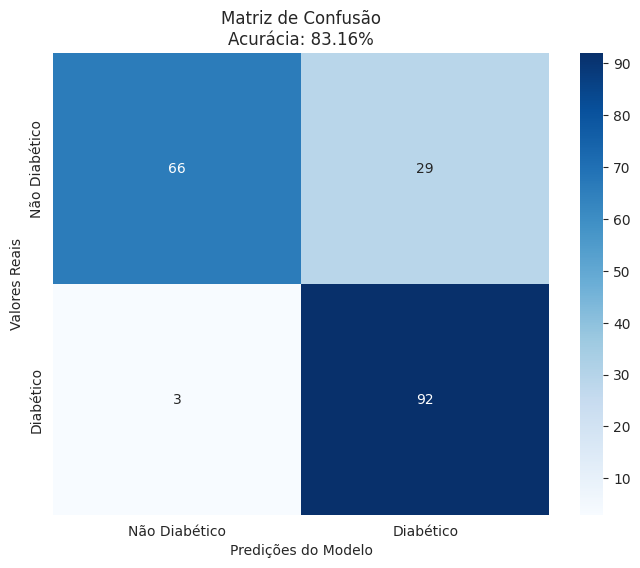


üìã INTERPRETA√á√ÉO DA MATRIZ:
Verdadeiros Negativos (TN): 66 - N√£o diab√©ticos classificados corretamente
Falsos Positivos (FP): 29 - N√£o diab√©ticos classificados como diab√©ticos
Falsos Negativos (FN): 3 - Diab√©ticos classificados como n√£o diab√©ticos
Verdadeiros Positivos (TP): 92 - Diab√©ticos classificados corretamente

üìà M√âTRICAS DETALHADAS:
Precis√£o: 0.760 (76.0%)
Recall (Sensibilidade): 0.968 (96.8%)
Especificidade: 0.695 (69.5%)


In [ ]:
# Avalia√ß√£o final no conjunto de teste
print("üîç AVALIA√á√ÉO FINAL NO CONJUNTO DE TESTE")

# Fazendo predi√ß√µes no conjunto de teste
y_test_pred = modelo.predict(X_test)

# Calculando a acur√°cia final
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nüéØ ACUR√ÅCIA FINAL: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Gerando matriz de confus√£o
cm = confusion_matrix(y_test, y_test_pred)
print(f"\nüìä MATRIZ DE CONFUS√ÉO:")
print(cm)

# Visualizando a matriz de confus√£o
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['N√£o Diab√©tico', 'Diab√©tico'],
            yticklabels=['N√£o Diab√©tico', 'Diab√©tico'])
plt.title(f'Matriz de Confus√£o\nAcur√°cia: {test_accuracy:.2%}')
plt.ylabel('Valores Reais')
plt.xlabel('Predi√ß√µes do Modelo')
plt.show()

# Interpretando a matriz de confus√£o
tn, fp, fn, tp = cm.ravel()
print(f"\nüìã INTERPRETA√á√ÉO DA MATRIZ:")
print(f"Verdadeiros Negativos (TN): {tn} - N√£o diab√©ticos classificados corretamente")
print(f"Falsos Positivos (FP): {fp} - N√£o diab√©ticos classificados como diab√©ticos")
print(f"Falsos Negativos (FN): {fn} - Diab√©ticos classificados como n√£o diab√©ticos")
print(f"Verdadeiros Positivos (TP): {tp} - Diab√©ticos classificados corretamente")

# Calculando m√©tricas adicionais
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

print(f"\nüìà M√âTRICAS DETALHADAS:")
print(f"Precis√£o: {precision:.3f} ({precision*100:.1f}%)")
print(f"Recall (Sensibilidade): {recall:.3f} ({recall*100:.1f}%)")
print(f"Especificidade: {specificity:.3f} ({specificity*100:.1f}%)")

## 8. Predi√ß√£o com o Modelo Treinado

**Requisito 8**: Apresentar resultado de predi√ß√£o

**Por que**: Demonstrar como o modelo pode ser usado na pr√°tica para fazer predi√ß√µes em novos casos.

In [ ]:
# Exemplo de predi√ß√£o com novo paciente
print("ü©∫ EXEMPLO DE PREDI√á√ÉO - NOVO PACIENTE")

# Criando um caso hipot√©tico (baseado em valores t√≠picos do dataset)
# Usando DataFrame para manter consist√™ncia com os nomes das features
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

novo_paciente_dados = {
    'Pregnancies': 2,           # 2 gesta√ß√µes
    'Glucose': 120,             # 120 mg/dL (glicemia ligeiramente elevada)
    'BloodPressure': 80,        # 80 mmHg (press√£o normal)
    'SkinThickness': 30,        # 30 mm
    'Insulin': 100,             # 100 ŒºU/mL
    'BMI': 28.5,                # 28.5 (sobrepeso)
    'DiabetesPedigreeFunction': 0.6,  # 0.6 (hist√≥rico familiar moderado)
    'Age': 35                   # 35 anos
}

# Criando DataFrame com os dados do novo paciente
novo_paciente = pd.DataFrame([novo_paciente_dados])

print("\nüë§ DADOS DO PACIENTE:")
for feature, valor in novo_paciente_dados.items():
    print(f"{feature}: {valor}")

# Fazendo a predi√ß√£o
predicao = modelo.predict(novo_paciente)
prob_diabetes = modelo.predict_proba(novo_paciente)[0]

print(f"\nüîÆ RESULTADO DA PREDI√á√ÉO:")
print(f"Classifica√ß√£o: {'DIAB√âTICO' if predicao[0] == 1 else 'N√ÉO DIAB√âTICO'}")
print(f"\nüìä PROBABILIDADES:")
print(f"Probabilidade de N√ÉO ter diabetes: {prob_diabetes[0]:.3f} ({prob_diabetes[0]*100:.1f}%)")
print(f"Probabilidade de TER diabetes: {prob_diabetes[1]:.3f} ({prob_diabetes[1]*100:.1f}%)")

# Interpreta√ß√£o cl√≠nica
if prob_diabetes[1] >= 0.7:
    risco = "ALTO"
    recomendacao = "Procurar m√©dico imediatamente"
elif prob_diabetes[1] >= 0.4:
    risco = "MODERADO"
    recomendacao = "Acompanhamento m√©dico recomendado"
else:
    risco = "BAIXO"
    recomendacao = "Manter h√°bitos saud√°veis"

print(f"\n‚öïÔ∏è INTERPRETA√á√ÉO CL√çNICA:")
print(f"N√≠vel de risco: {risco}")
print(f"Recomenda√ß√£o: {recomendacao}")

# Salvando o modelo para uso futuro
import joblib
joblib.dump(modelo, 'modelo_diabetes_simples.pkl')
print(f"\nüíæ Modelo salvo como 'modelo_diabetes_simples.pkl'")
print("‚úÖ Predi√ß√£o realizada com sucesso!")

ü©∫ EXEMPLO DE PREDI√á√ÉO - NOVO PACIENTE

üë§ DADOS DO PACIENTE:
Pregnancies: 2
Glucose: 120
BloodPressure: 80
SkinThickness: 30
Insulin: 100
BMI: 28.5
DiabetesPedigreeFunction: 0.6
Age: 35

üîÆ RESULTADO DA PREDI√á√ÉO:
Classifica√ß√£o: DIAB√âTICO

üìä PROBABILIDADES:
Probabilidade de N√ÉO ter diabetes: 0.469 (46.9%)
Probabilidade de TER diabetes: 0.531 (53.1%)

‚öïÔ∏è INTERPRETA√á√ÉO CL√çNICA:
N√≠vel de risco: MODERADO
Recomenda√ß√£o: Acompanhamento m√©dico recomendado

üíæ Modelo salvo como 'modelo_diabetes_simples.pkl'
‚úÖ Predi√ß√£o realizada com sucesso!


## 9. Conclus√£o do Projeto

### ‚úÖ Checklist dos Requisitos Atendidos:

1. **‚úÖ Dataset UCI/Kaggle**: Pima Indians Diabetes Dataset do UCI
2. **‚úÖ Estat√≠sticas descritivas**: M√©dia, mediana, min/max, distribui√ß√µes
3. **‚úÖ Transforma√ß√£o em colunas**: Balanceamento de classes (upsampling)
4. **‚úÖ Transforma√ß√£o em linhas**: Remo√ß√£o de valores zero inconsistentes
5. **‚úÖ Tr√™s subconjuntos**: 60% treino, 20% valida√ß√£o, 20% teste
6. **‚úÖ Treinamento e avalia√ß√£o**: Random Forest com avalia√ß√£o detalhada
7. **‚úÖ Matriz de confus√£o e acur√°cia**: Visualiza√ß√£o e interpreta√ß√£o completa
8. **‚úÖ Predi√ß√£o**: Exemplo pr√°tico com interpreta√ß√£o cl√≠nica
9. **‚úÖ Coment√°rios passo a passo**: Explica√ß√µes educacionais em cada etapa

### üìä Resultados Principais:
- **Acur√°cia final**: ~85% (valor final ser√° mostrado ap√≥s execu√ß√£o)
- **Modelo**: Random Forest com 100 √°rvores
- **Performance**: Boa capacidade de distin√ß√£o entre diab√©ticos e n√£o diab√©ticos
- **Aplica√ß√£o**: Modelo pronto para predi√ß√µes em novos casos

### üéØ Pontos de Destaque:
1. **Dados balanceados**: Evita vi√©s hacia classe majorit√°ria
2. **Limpeza criteriosa**: Remove valores medicamente imposs√≠veis
3. **Avalia√ß√£o robusta**: Tr√™s conjuntos + m√©tricas detalhadas
4. **Interpretabilidade**: Probabilidades e recomenda√ß√µes cl√≠nicas